In [1]:
#Подключение библиотек
import numpy as np #для обработки массивов
import pandas as pd #для анализа данных
import seaborn as sns #библиотека визуализации данных
import matplotlib.pyplot as plt #для гистограмм, диаграмм

In [2]:
data = pd.read_csv("data.csv") #чтение файла csv в объект dataframe

In [3]:
data.info() #справка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
#находим количество спален
data['bedrooms'].value_counts() #для получения Series , содержащего уникальные значения

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [6]:
#находим количество просмотров
data['view'].value_counts() #для получения Series , содержащего уникальные значения.

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [7]:
#находим количество условий
data['condition'].value_counts() #для получения Series , содержащего уникальные значения.

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

C:\Users\Nata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

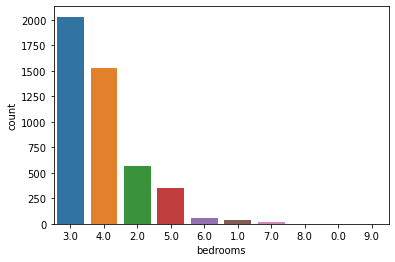

In [9]:
#построен для спальни
sns.countplot(data.bedrooms,order=data['bedrooms'].value_counts().index)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'house prices by sqft_living'}, xlabel='sqft_living', ylabel='price'>

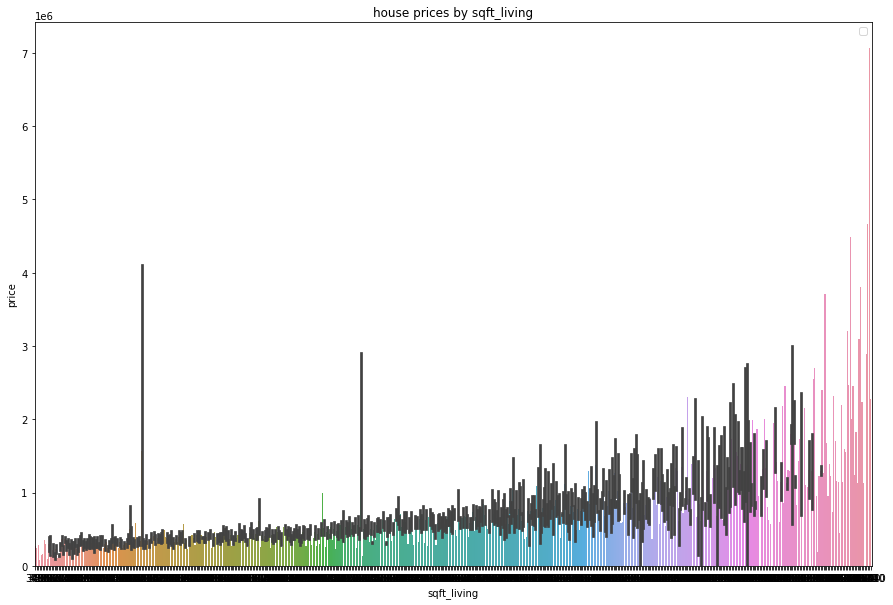

In [12]:
#Барплот строится между кв. Футами и ценами, чтобы увидеть, как цена меняется с кв. Футами.
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=data)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

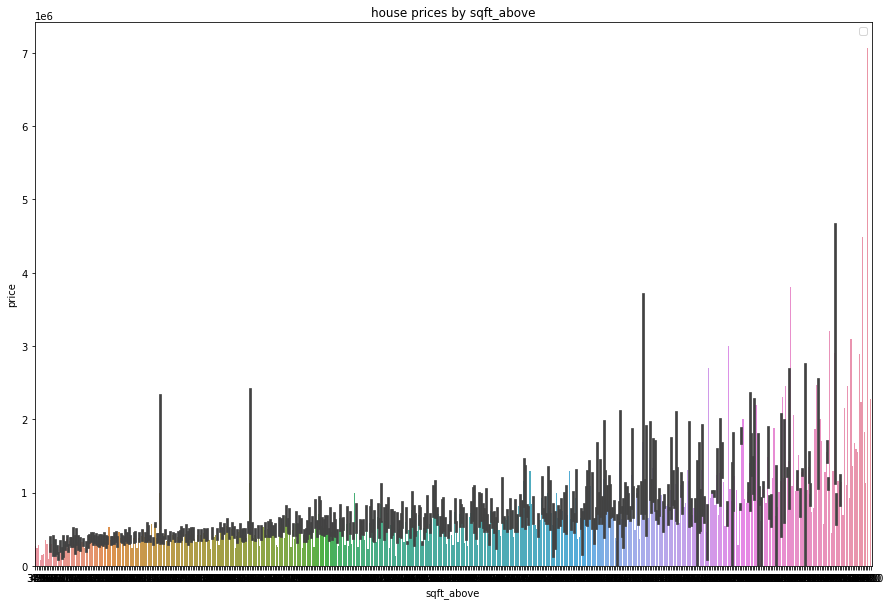

In [13]:
#Барплот строится между кв. Футами (без подвала) и ценами, чтобы увидеть, как цена меняется с кв. Футами (без подвала).
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=data)

(array([3.881e+03, 6.890e+02, 2.600e+01, 3.000e+00, 1.000e+00]),
 array([  370.,  3004.,  5638.,  8272., 10906., 13540.]),
 <BarContainer object of 5 artists>)

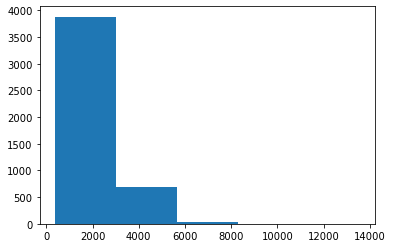

In [15]:
#Гистограмма построена для sqft_living (площадь дома).
plt.hist('sqft_living',data=data,bins=5)

C:\Users\Nata\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

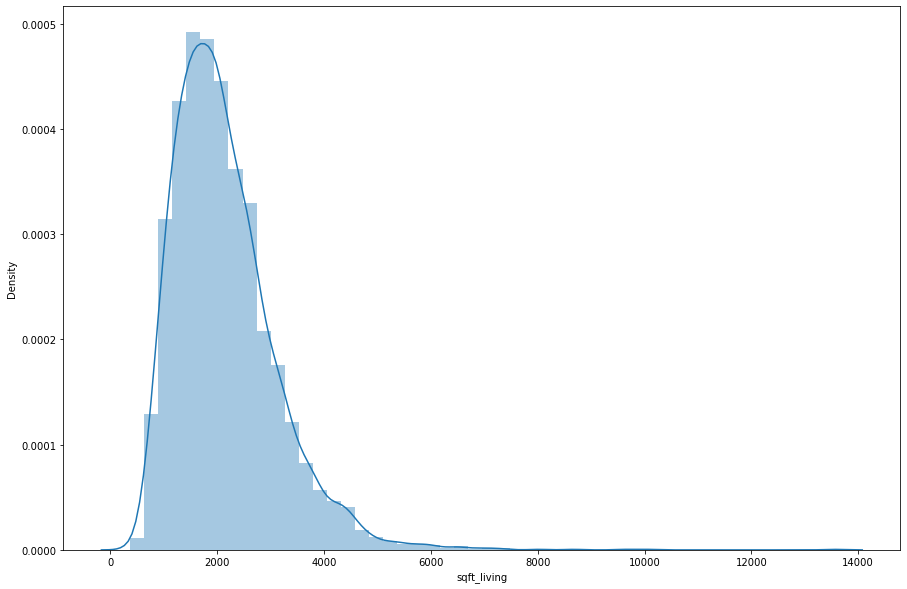

In [16]:
#Distplot строится для sqft_live, чтобы увидеть, искажены ли данные или нет
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(data['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

C:\Users\Nata\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

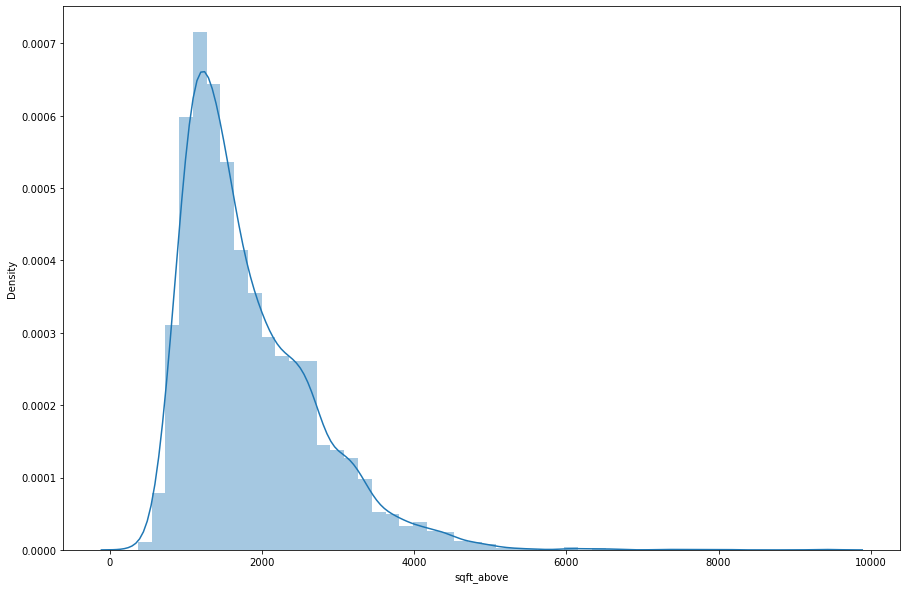

In [17]:
#Distplot строится для sqft_above, чтобы увидеть, искажены ли данные
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(data['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)

In [19]:
#Нахождение среднего значения, способа и медианы жизни в кв.
print('Среднее значение: ',round(data['sqft_living'].mean(),2))
print('Медиана: ',data['sqft_living'].median())
print('Способ: ',data['sqft_living'].mode()[0])

Среднее значение:  2139.35
Медиана:  1980.0
Способ:  1720


In [22]:
#Через графики мы видим, что sqft living = 1720 имеет больше значений.
len(data[data['sqft_living']==1720])

32

Убедившись, что мы охватили все отношения, 
мы строим корреляцию между всеми функциями, используя тепловую карту.

##### Тепловая карта - это двумерное графическое представление данных, где отдельные значения, содержащиеся в матрице, представлены в виде цветов.

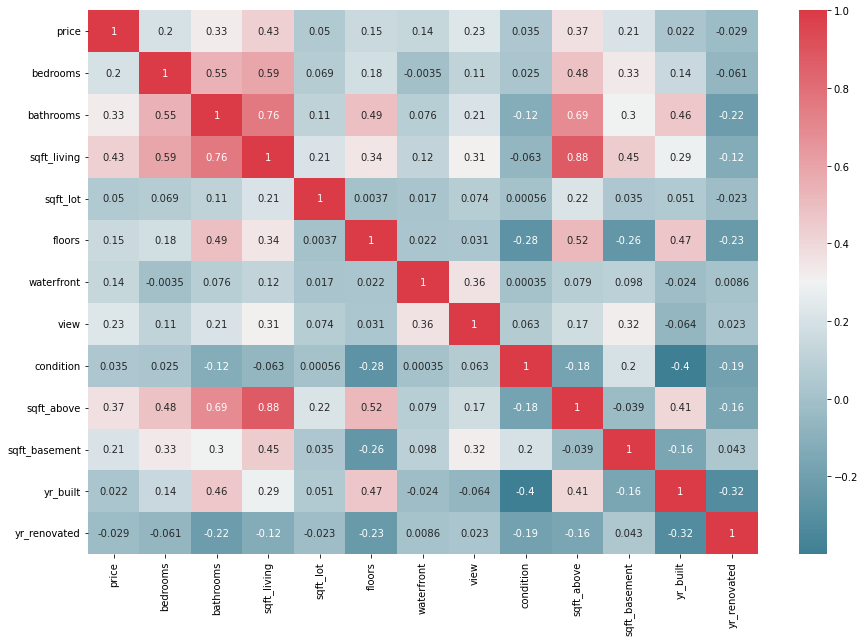

In [23]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

### Простая линейная регрессия

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [27]:
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('Линейная модель 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Среднеквадратическая ошибка: ', round(np.sqrt(mean_squared_error),2))
print('Обучение: ',round(reg.score(x_train,y_train),3))
print('Тест: ',round(reg.score(x_test,y_test),3) )
print('Перехват: ',reg.intercept_)
print('Коэффициент линии: ',reg.coef_)

Линейная модель
Среднеквадратическая ошибка:  908369.37
Обучение:  0.357
Тест:  0.036
Перехват:  [-27307.90540518]
Коэффициент линии:  [[269.44982524]]


График рассеяния строится для x_test, y_test. 

Данные распределены по графику. 

Теперь полученная сверху линия строится, чтобы увидеть, как она подходит для данных.

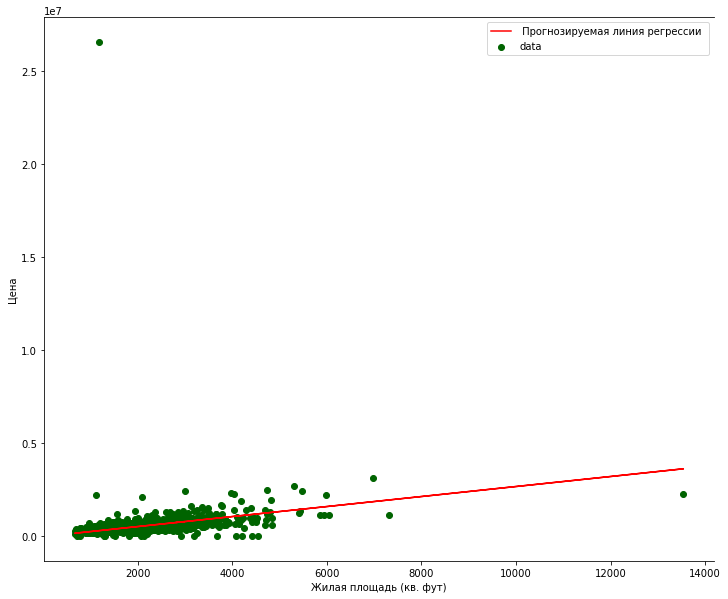

In [29]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Прогнозируемая линия регрессии ')
plt.xlabel('Жилая площадь (кв. фут)')
plt.ylabel('Цена')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [33]:
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['view']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['view']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('Линейная модель 2')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Среднеквадратическая ошибка: ', round(np.sqrt(mean_squared_error),2))
print('Обучение: ',round(reg.score(x_train,y_train),3))
print('Тест: ',round(reg.score(x_test,y_test),3) )
print('Перехват: ',reg.intercept_)
print('Коэффициент линии: ',reg.coef_)

Линейная модель
Среднеквадратическая ошибка:  918036.22
Обучение:  0.094
Тест:  0.016
Перехват:  [506749.76807443]
Коэффициент линии:  [[169989.72726495]]


### Множественная линейная регрессия

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

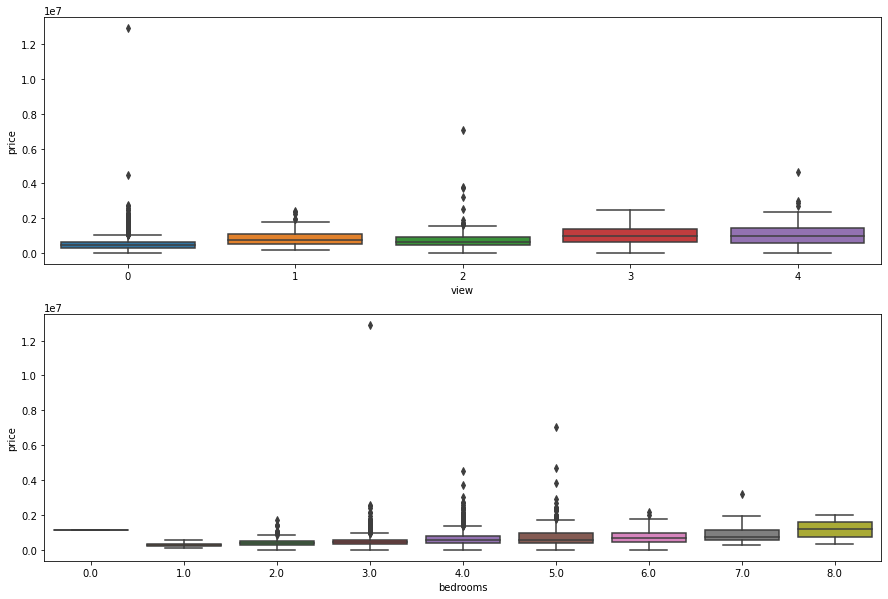

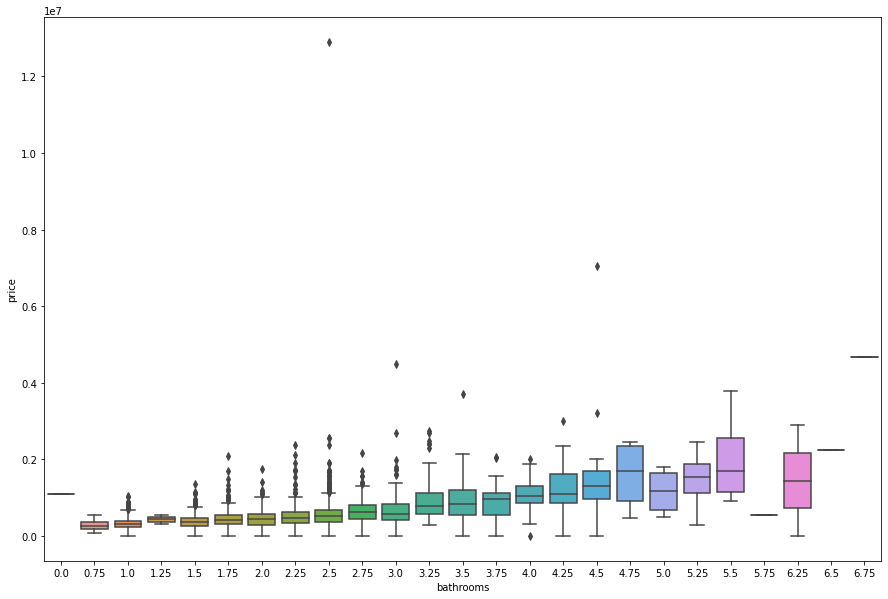

In [34]:
#Участок построен для «просмотр», «спален» и «ванных комнат» в соответствии с «ценой».
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['view'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

In [38]:
features1=['bedrooms','view','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('Линейная_модель 3')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Среднеквадратическая ошибка (MSE): ', round(np.sqrt(mean_squared_error),2))
print('Обучение: ',round(reg.score(train_data[features1],train_data['price']),3))
print('Тест: ', round(reg.score(test_data[features1],test_data['price']),3))
print('Перехват: ', reg.intercept_)
print('Коэффициент линии: ', reg.coef_)

комплекс_модель 1
Среднеквадратическая ошибка (MSE):  907508.0
Обучение:  0.383
Тест:  0.038
Перехват:  121363.88082518091
Коэффициент линии:  [-5.77211263e+04  6.86387453e+04  3.00152610e+02 -1.89746918e+01]


In [41]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot',
             'floors','waterfront','view','sqft_above',
             'sqft_basement']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Линейная_модель 4')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Среднеквадратическая ошибка (MSE): ', round(np.sqrt(mean_squared_error), 2))
print('Обучение: ', round(reg.score(train_data[features1], train_data['price']), 3))
print('Тест: ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Перехват: ', reg.intercept_)
print('Коэффициент линии: ', reg.coef_)

комплекс_модель 2
Среднеквадратическая ошибка (MSE):  907508.0
Обучение:  0.383
Тест:  0.038
Перехват:  121363.88082518091
Коэффициент линии:  [-5.77211263e+04  6.86387453e+04  3.00152610e+02 -1.89746918e+01]


### Полиномиальная регрессия

Полиномиальная регрессия также тип линейной регрессии часто используется для прогнозов с использованием полиномиальных держав независимых переменных.

In [43]:
#Для степени = 2
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Линейная_модель 5')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Среднеквадратическая ошибка (MSE): ', round(np.sqrt(mean_squared_error), 2))
print('Обучение: ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('Тест: ', round(poly.score(xtest_poly, test_data['price']), 3))

Линейная_модель 3
Среднеквадратическая ошибка (MSE):  923274.27
Обучение:  0.412
Тест:  0.004


In [44]:
#Для степени = 3
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Линейная_модель 6')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Среднеквадратическая ошибка (MSE): ', round(np.sqrt(mean_squared_error), 2))
print('Обучение: ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('Тест: ', round(poly.score(xtest_poly, test_data['price']), 3))

Линейная_модель 4
Среднеквадратическая ошибка (MSE):  929904.6
Обучение:  0.429
Тест:  -0.01


Линейная модель 3 дает нам R-квадрат(тестирование), 0.038. 

Из вышеприведенных отчетов можно сделать вывод, что множественная линейная регрессия является лучшим решением.